# Music Popularity based on Chinook database


# Group 2 XXX(Q7-10) & Xiaoqi Yan(Q1-6)

#### How to define popular music?

We consider the more consumption of a song means more popular it is. We are going to analysis music popularity from these four aspects,which are genre popularity, playlist popularity, album popularity as well as artist popularity.

### Dataset issues

Before going through the questions and queries, we want to clarify some limitaions in this dataset since it affects the qestions we researched and the credibility of the results to some extent.

First, the amount of data is small, causing the results may not very accurate and convincible. For example, we initially want to query the top 3 consumed songs per year. But we discovered that the number of times a song purchased was three maximum and majority of songs were just consumed once. This problably be inconsistent with real situations.

Second, the track production numbers of artists are not included in this database, which hinder our research of the correlation between artist popularity and their production amounts. Although we can count how many albums/tracks an artist has in this database, the counting results are based on the customers consumption.For example, artist A may produce 50 tracks during 2009-2013, but only 2 of them are bought by Chinook customers.

Thrid, the Chinook databease contains invoice data from 2009 to 2013, which limited our results in these five years. And it is difficult to see changes in a long term. 

In [1]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
host = "localhost"
usrname = "root"
pwd= "" 
conn = mysql.connector.connect(host=host, user=usrname, passwd=pwd)
cursor = conn.cursor(buffered=True,dictionary=True)

In [4]:
cursor.execute("USE chinook");

# genre popularity

## Question1

1.1 What are popular genres in the world in these five years(2009-2013)? Top 3 consumed genres are defined as Popular Genres Worldwide. 

In this question, we hope to get a holistic understanding of genre popularity so I counted absolute genre sales in five years in all contries with joining these three tables:invoiceline,track,genre. 


In [5]:
query1_1 = '''
    SELECT g.Name as genre_name, COUNT(*) as genre_sales
    FROM invoiceline as il
    JOIN track as t
      ON il.TrackId = t.TrackId
    JOIN genre as g
      ON g.GenreId = t.GenreId
    GROUP BY g.Name
    ORDER BY COUNT(*) DESC
    LIMIT 3
'''

pd.read_sql(query1_1, conn)



D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_name,genre_sales
0,Rock,835
1,Latin,386
2,Metal,264


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<Figure size 432x288 with 0 Axes>

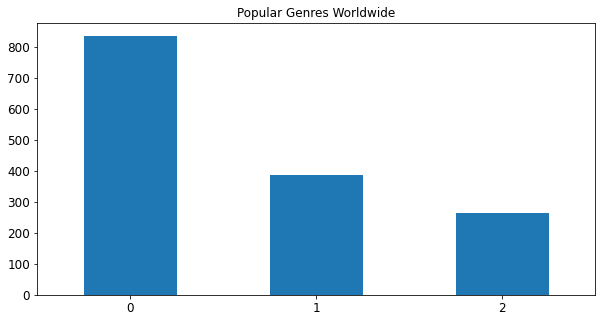

In [6]:
df1_1 = pd.read_sql(query1_1, conn)
plt.figure()
ax1 = df1_1[['genre_sales']].plot(
    kind='bar',
    title ="Popular Genres Worldwide",
    figsize=(10, 5),
    legend=False,
    fontsize=12)
for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
plt.show()

#### Results analysis
1.Rock is the most popular genre worldwide, the second is Latin, and the third is Metal.so Popular genres worldwide contains rock,Latin,Metal.
2.The consumption of Rock is more than two time of the consumption of the second popular genre Latin, which means rock is very popular genre.


Question 1.2: How have top3 popular genres worldwide per year changed from 2009 to 2013? I queried top3 most-purchased genres in all contries in each year from 2009 to 2013.

In [7]:
query1_2 = '''
    WITH genre_sales_per_year
    AS(SELECT YEAR(InvoiceDate) as Year,g.Name as genre_name,COUNT(*) as genre_sales
    FROM invoiceline as il
    JOIN track as t
    ON il.TrackId = t.TrackId
    JOIN invoice as i
    ON i.InvoiceId = il.InvoiceId
    JOIN genre as g
    ON g.GenreId = t.GenreId
    GROUP BY YEAR(InvoiceDate), g.Name)
    SELECT *
    FROM genre_sales_per_year g1
    WHERE (
    SELECT count(*) FROM genre_sales_per_year g2
    WHERE g1.Year = g2.Year AND g1.genre_sales < g2.genre_sales
    ) < 3
    ORDER BY Year,
    genre_sales DESC
'''

pd.read_sql(query1_2, conn)


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Year,genre_name,genre_sales
0,2009,Rock,180
1,2009,Latin,83
2,2009,Alternative & Punk,63
3,2010,Rock,157
4,2010,Latin,78
5,2010,Metal,54
6,2011,Rock,158
7,2011,Latin,81
8,2011,Alternative & Punk,46
9,2012,Rock,164


#### Results analysis
In 2010 and 2012, the top 3 popular genres are the same as Popular genres worldwide, which contains rock,Latin,Metal.
But in 2009,2011,2013, Alternative & Punk is included in top 3 popular genres. However, its sales are still much less than that of rock. 

## Question2

2.1 In 2009-2013, which genre was the most popular for each country? 


In [8]:
query2_1 = '''
    WITH genre_porpularity_per_country AS (
        SELECT c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
        ON il.TrackId = t.TrackId
        JOIN invoice as i
        ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
        ON g.GenreId = t.GenreId
        JOIN customer as c
        ON c.CustomerId = i.CustomerId
        GROUP BY c.Country, g.Name)
    SELECT gp.Country, gp.genre_name, gp.genre_sales
    FROM (
        SELECT Country, MAX(genre_sales) as max_genre_sales
        FROM genre_porpularity_per_country
        GROUP BY Country
    ) AS q
    INNER JOIN genre_porpularity_per_country as gp
    ON gp.Country = q.Country AND gp.genre_sales = q.max_genre_sales
'''

pd.read_sql(query2_1, conn)



D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Country,genre_name,genre_sales
0,Argentina,Rock,9
1,Argentina,Alternative & Punk,9
2,Australia,Rock,22
3,Austria,Rock,15
4,Belgium,Rock,21
5,Brazil,Rock,81
6,Canada,Rock,107
7,Chile,Rock,9
8,Czech Republic,Rock,25
9,Denmark,Rock,21


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


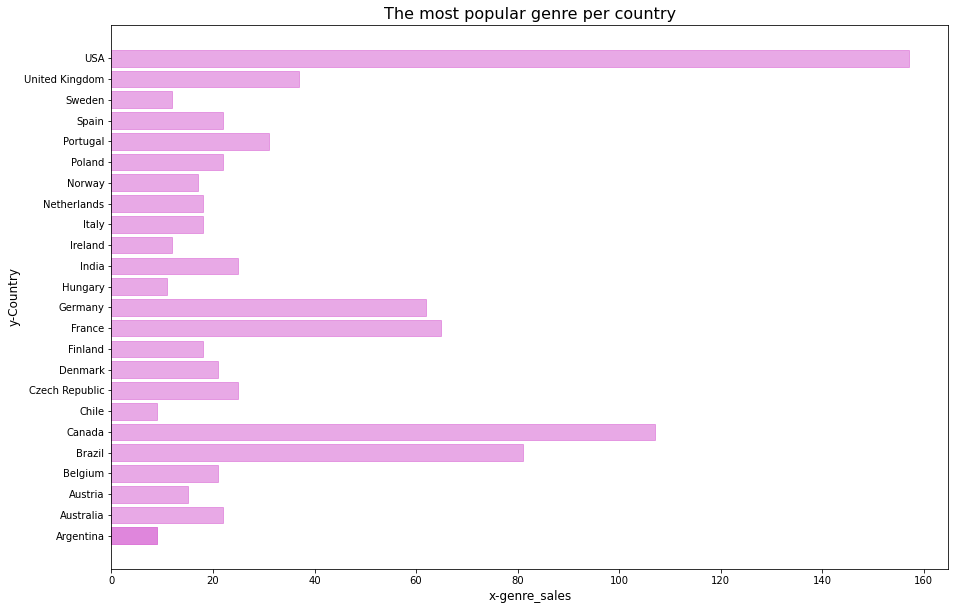

In [9]:
df21 = pd.read_sql(query2_1, conn)

plt.figure(figsize = (15,10))
plt.title('The most popular genre per country',fontsize = 16)
plt.xlabel(u'x-genre_sales',fontsize = 12)
plt.ylabel(u'y-Country',fontsize = 12)
plt.barh(df21['Country'],df21['genre_sales'],alpha=0.6,facecolor = 'orchid',edgecolor = 'orchid')
plt.show()

Due to my inadequent knowledge of visulization, I could not make the color of the bars diffenert based on the genres. This graph  in PPT is manully made.

#### Result analysis

Rock is the most popular genre in majority of countries. There is difference in Sweden and Argentina. Alternative&Punk is the most popular genre in Sweden and the most popular genres in Argentina are latin and rock.


Question 2.2: How much overlap is there between popular genres? I calculated the percentage of the most popular genre among all countries.

In [10]:
query2_2 = '''
    WITH genre_porpularity_per_country AS (
        SELECT c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
        ON il.TrackId = t.TrackId
        JOIN invoice as i
        ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
        ON g.GenreId = t.GenreId
        JOIN customer as c
        ON c.CustomerId = i.CustomerId
        GROUP BY c.Country, g.Name),
        most_popular_genre_per_country AS (
            SELECT gp.Country, gp.genre_name, gp.genre_sales
            FROM (
                SELECT Country, MAX(genre_sales) as max_genre_sales
                FROM genre_porpularity_per_country
                GROUP BY Country
                ) AS q
            INNER JOIN genre_porpularity_per_country as gp
            ON gp.Country = q.Country AND gp.genre_sales = q.max_genre_sales)
    SELECT genre_name, Count(*), 100*COUNT(*)/25 as percentage
    FROM most_popular_genre_per_country
    GROUP BY genre_name 
'''

pd.read_sql(query2_2, conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_name,Count(*),percentage
0,Alternative & Punk,1,4.0
1,Latin,1,4.0
2,Rock,23,92.0


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


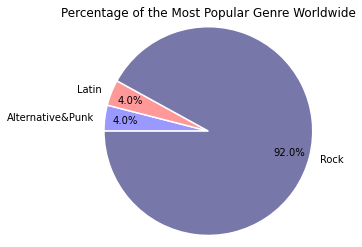

In [11]:
df22 = pd.read_sql(query2_2, conn)
plt.pie(x=df22['percentage'],  
        explode= None, 
        labels= ['Alternative&Punk','Latin','Rock'], 
        colors=['#9999ff', '#ff9999', '#7777aa'],
        autopct='%.1f%%',  
        pctdistance=0.8,  
        labeldistance=1.1, 
        startangle=180,  
        radius=1.2, 
        counterclock=False, 
        wedgeprops={'linewidth':1.5, 'edgecolor':'white'},  
        textprops={'fontsize':10, 'color':'black'},  
        )
plt.title('Percentage of the Most Popular Genre Worldwide')
plt.show()

#### Some suggestions for the company

Compared to other genres, promoting Rock music around the world are more likely to get good economic benefits. Especially in countries consumed more tracks of this genre like USA, France, Germany,Canada,Brazil.


## Question3

Compare the popularity of genre ‘Alternative & Punk’ in European countries and North America countries.

In [12]:
query3_1 = '''
    WITH country_popularity AS (
        SELECT c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
        ON il.TrackId = t.TrackId
        JOIN invoice as i
        ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
        ON g.GenreId = t.GenreId
        JOIN customer as c
        ON c.CustomerId = i.CustomerId
        GROUP BY c.Country, g.Name)
    SELECT genre_name, country, genre_sales
    FROM country_popularity
    WHERE genre_name = 'Alternative & Punk' AND country in ('USA','Canada')     
'''
pd.read_sql(query3_1,conn)


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_name,country,genre_sales
0,Alternative & Punk,Canada,36
1,Alternative & Punk,USA,50


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


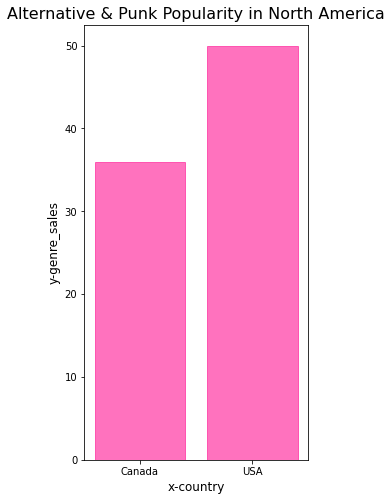

In [13]:
df31 = pd.read_sql(query3_1,conn)

plt.figure(figsize = (4,8))
plt.title('Alternative & Punk Popularity in North America',fontsize = 16)
plt.xlabel(u'x-country',fontsize = 12)
plt.ylabel(u'y-genre_sales',fontsize = 12)
plt.bar(df31['country'],df31['genre_sales'],alpha=0.6,facecolor = 'deeppink',edgecolor = 'deeppink')
plt.show()

In [14]:
query3_2 = '''
    WITH country_popularity AS (
        SELECT c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
        ON il.TrackId = t.TrackId
        JOIN invoice as i
        ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
        ON g.GenreId = t.GenreId
        JOIN customer as c
        ON c.CustomerId = i.CustomerId
        GROUP BY c.Country, g.Name)
    SELECT genre_name, country, genre_sales
    FROM country_popularity
    WHERE genre_name = 'Alternative & Punk' 
    HAVING country in ('Austria','Belgium','Czech Republic','Denmark','Finland','France','Germany','Hungary','Italy','Netherlands','Norway','Poland','Portugal','Spain','Sweden','United Kingdom')     
'''
pd.read_sql(query3_2,conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_name,country,genre_sales
0,Alternative & Punk,Belgium,14
1,Alternative & Punk,Czech Republic,9
2,Alternative & Punk,Denmark,4
3,Alternative & Punk,Finland,2
4,Alternative & Punk,France,31
5,Alternative & Punk,Germany,13
6,Alternative & Punk,Hungary,3
7,Alternative & Punk,Italy,11
8,Alternative & Punk,Netherlands,5
9,Alternative & Punk,Norway,2


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


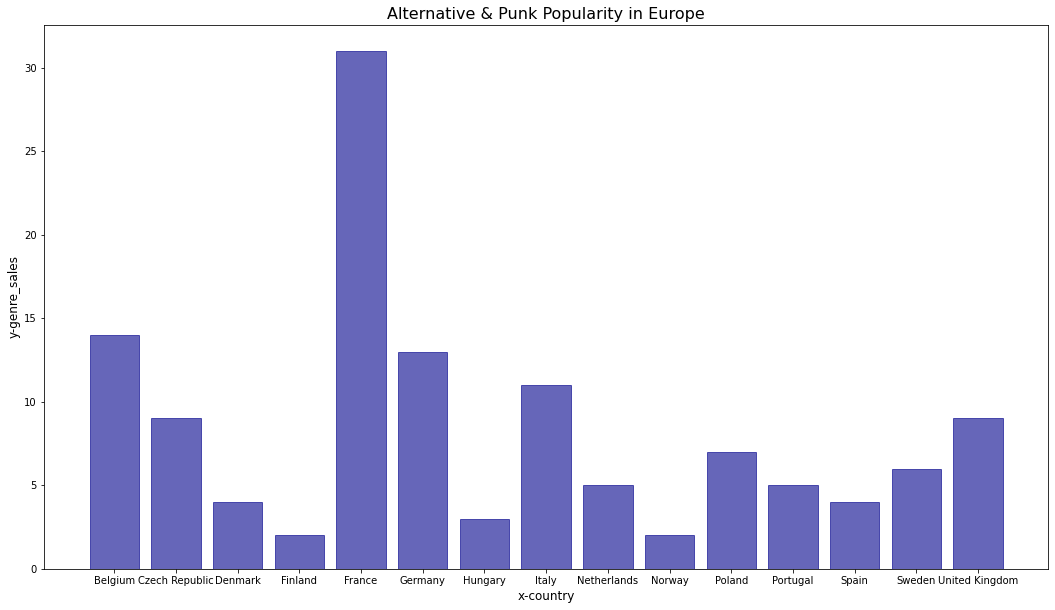

In [15]:
df32 = pd.read_sql(query3_2,conn)

plt.figure(figsize = (18,10))
plt.title('Alternative & Punk Popularity in Europe',fontsize = 16)
plt.xlabel(u'x-country',fontsize = 12)
plt.ylabel(u'y-genre_sales',fontsize = 12)
plt.bar(df32['country'],df32['genre_sales'],alpha=0.6,facecolor = 'darkblue',edgecolor = 'darkblue')
plt.show()

#### Results analysis

1.Alternative&Punk is more popular in North American Countries. But it may because they have lager population than European countries. 

2.But it still remains popularity among particular European Countries such as France, Belgium, Germany, Italy. 


#### Suggestions for the company 

1. It is worthy to promote Alternative&Punk music. Through Alternative&Punk is not the mainstream genre, it has become the top 3 popular genre in three years from 2009 to 2013. 
2. It probably has promising market of Alternative&Punk music in North Amercian Countries(Canada and USA)
3. Europe also has a good market for Alternative&Punk music, but not every country worths to develop their business. They can pay more attention to promote this genre to Countries like France, Belgium, Germany, Italy. Because these countries are tend to give a positive feedback of consumption of this genre.

## Question4

How has the most popular genre in the USA changed from 2009 to 2013? Is there any overlap?


In [16]:
query4_1 = '''
    With USA_genre_porpularity AS (
        SELECT YEAR(InvoiceDate) as Year,c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
          ON il.TrackId = t.TrackId
        JOIN invoice as i
          ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
          ON g.GenreId = t.GenreId
        JOIN customer as c
          ON c.CustomerId = i.CustomerId
        GROUP BY YEAR(InvoiceDate), c.Country
        HAVING c.Country = 'USA')
    SELECT *
    FROM USA_genre_porpularity ug1
    WHERE (
        SELECT COUNT(*) FROM USA_genre_porpularity ug2
        WHERE ug1.Year = ug2.Year AND ug1.genre_sales < ug2.genre_sales
    ) < 1
    ORDER BY Year,
    genre_sales DESC
'''

pd.read_sql(query4_1, conn)



D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Year,Country,genre_name,genre_sales
0,2009,USA,Jazz,105
1,2010,USA,Blues,102
2,2011,USA,Rock,99
3,2012,USA,Latin,102
4,2013,USA,Latin,86


#### Results analysis 

1. Latin has become the most popular genre for two years (2012, 2013)

2. Superisinly, there are two popular genres in USA, but they are not in the list of Popular_Genre_Worldwide,which are Jazz and Blues


## Question 5

5.1 What are the popular genres (top3) in Canada in five years? 
5.2 What is the proportion of the consumption of popular genres in this country respectively? 


In [17]:
query5_1 = '''
    WITH genre_popularity AS (
        SELECT c.Country, g.Name as genre_name, COUNT(*) as genre_sales
        FROM invoiceline as il
        JOIN track as t
        ON il.TrackId = t.TrackId
        JOIN invoice as i
        ON i.InvoiceId = il.InvoiceId
        JOIN genre as g
        ON g.GenreId = t.GenreId
        JOIN customer as c
        ON c.CustomerId = i.CustomerId
            GROUP BY c.Country, g.Name),
        genre_popularity_canada AS (
            SELECT *
            FROM genre_popularity
                WHERE Country = 'Canada'
                ORDER BY genre_sales DESC),
        percentage_world AS (
            SELECT gpc.country, gpc.genre_name, 100*gpc.genre_sales/sg.genre_sales_sum as percentage_world
            FROM genre_popularity_canada gpc
            LEFT JOIN (
                SELECT genre_name, SUM(genre_sales) as genre_sales_sum
                FROM genre_popularity
                GROUP BY genre_name) sg
            ON gpc.genre_name = sg.genre_name),
        percentage_Canada AS (
            SELECT 
                gpc1.Country,
                gpc1.genre_name, 
                gpc1.genre_sales, 
                100*gpc1.genre_sales/(SELECT SUM(genre_sales) FROM genre_popularity_canada) as percentage_Canada
            FROM genre_popularity_canada gpc1, genre_popularity_canada gpc2
            WHERE gpc1.genre_sales <= gpc2.genre_sales 
            GROUP BY gpc1.genre_name,gpc1.genre_sales
            ORDER BY gpc1.genre_sales DESC, gpc1.genre_name DESC
        )
    SELECT pC.Country, pC.genre_name, pC.genre_sales, pC.percentage_Canada, pw.percentage_world
    FROM percentage_Canada pC
    JOIN percentage_world pw
    ON pC.genre_name = pw.genre_name
    ORDER BY pC.genre_sales DESC
    LIMIT 3
'''

pd.read_sql(query5_1,conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Country,genre_name,genre_sales,percentage_Canada,percentage_world
0,Canada,Rock,107,35.1974,12.8144
1,Canada,Latin,60,19.7368,15.5440
2,Canada,Metal,40,13.1579,15.1515


#### Results analysis
1. Top 3 popular genres in Canada are  Rock, Latin, Metal, which accounts for about 35%,20%,13% of consumptions in Canada respectively.  
2. Top 3 popular genres occupy 43% of consumptions in the world, which means Canada is a extremely important country to do business for Chinook.


## Question6

What kind of genres do the tracks that are bought by the most loyal customer belong to? 

In [18]:
query6 = '''
WITH top_consumer AS (
    SELECT DISTINCT i.CustomerId, i.invoiceId, SUM(i.Total) as 'Total Sales'
    FROM Invoice i 
    GROUP BY i.CustomerId
    ORDER BY SUM(i.Total) DESC 
    LIMIT 1)
    
SELECT DISTINCT tc.CustomerId, c.FirstName, c.LastName, g.Name as genre_name 
FROM top_consumer tc
LEFT JOIN invoiceline il
       ON tc.InvoiceId = il.InvoiceId
LEFT JOIN track t
       ON t.TrackId = il.TrackId
LEFT JOIN genre g
       ON g.GenreId = t.GenreId
LEFT JOIN customer c
       ON c.CustomerId = tc.CustomerId
'''
pd.read_sql(query6,conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,FirstName,LastName,genre_name
0,6,Helena,Holý,Rock
1,6,Helena,Holý,R&B/Soul
2,6,Helena,Holý,Electronica/Dance
3,6,Helena,Holý,Alternative & Punk


# Playlist Popularity

## question 7

Is the playlist named “Brazilian Music” popular in Brazil?

Which country loves the most “Brazilian Music” playlist based on customer purchases?

To answer this, we select all the countries that have purchased the tracks in the playlist named “Brazilian Music”

In [19]:
sql_query = """
SELECT
  Customer.Country,
  COUNT(Customer.Country) AS BrazilianMusicCount,
  Playlist.Name

FROM InvoiceLine
JOIN Track
  ON InvoiceLine.TrackId = Track.TrackId

JOIN PlaylistTrack
  ON PlaylistTrack.TrackId = Track.TrackId

JOIN Playlist
  ON Playlist.PlaylistId = PlaylistTrack.PlaylistId

JOIN Invoice
  ON Invoice.InvoiceId = InvoiceLine.InvoiceId
  
JOIN Customer
  ON Invoice.CustomerId = Customer.CustomerId

WHERE Playlist.Name LIKE 'Brazilian Music'
GROUP BY 1
ORDER BY 2 DESC
"""

pd.read_sql(sql_query, conn) 

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Country,BrazilianMusicCount,Name
0,USA,12,Brazilian Music
1,Brazil,5,Brazilian Music
2,Canada,4,Brazilian Music
3,Chile,2,Brazilian Music
4,Germany,2,Brazilian Music
5,Argentina,1,Brazilian Music
6,France,1,Brazilian Music


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


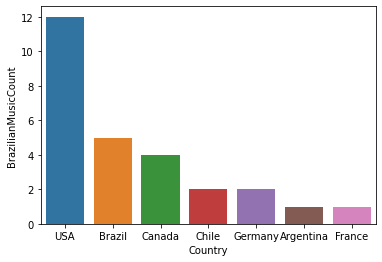

In [20]:
import seaborn as sns
df_BrazilMusic = pd.read_sql(sql_query, conn)
sns.barplot(x = "Country", y="BrazilianMusicCount",data=df_BrazilMusic);

This graph shows that the playlist named “Brazilian Music” is most liked by USA. But it is also popular in Brazil (rank 2).

# Album Popularity

## question 8

Find the most popular album: which album includes most hit tracks?

To answer this question, we first retrieved the track name, album name, albumID and trackID for all the albums in the database.

In [21]:
sql_query = """
SELECT Track.Name,
       Album.Title AS Album,
       Album.AlbumID,
       Track.TrackId
FROM Track INNER JOIN Album
ON Track.AlbumId = Album.AlbumId; 
"""

pd.read_sql(sql_query, conn) 

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Name,Album,AlbumID,TrackId
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,1,1
1,Put The Finger On You,For Those About To Rock We Salute You,1,6
2,Let's Get It Up,For Those About To Rock We Salute You,1,7
3,Inject The Venom,For Those About To Rock We Salute You,1,8
4,Snowballed,For Those About To Rock We Salute You,1,9
...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) I Pini Della Vi...,Respighi:Pines of Rome,343,3499
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,344,3500
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,345,3501
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,346,3502


Then, we listed the track name, the times this track is purchased, the album name it belongs to, albumID and trackID for the top 20 most purchased tracks.

We find that the album named “A Real Dead One” (albumID: 95) includes four top 20 songs, more than any other albums.

In [22]:
sql_query = """

    SELECT tr.Name, COUNT(inl.InvoiceLineId), al.Title, al.AlbumId, tr.TrackId
    FROM Track AS tr JOIN Album al
    ON tr.AlbumId = al.AlbumId
    JOIN InvoiceLine AS inl
    WHERE tr.TrackId = Inl.TrackId
    GROUP BY tr.Name
    ORDER BY COUNT(inl.InvoiceLineId) DESC
    Limit 20;
"""

pd.read_sql(sql_query, conn)# what albums include top 20 most purchased tracks?

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Name,COUNT(inl.InvoiceLineId),Title,AlbumId,TrackId
0,The Trooper,5,A Real Dead One,95,1213
1,Dazed and Confused,5,BBC Sessions [Disc 1] [Live],30,340
2,Hallowed Be Thy Name,4,Live At Donington 1992 (Disc 2),104,1321
3,Untitled,4,Live On Two Legs [Live],178,2154
4,The Number Of The Beast,4,Live After Death,102,1295
5,Eruption,4,"The Best Of Van Halen, Vol. I",243,3064
6,Sure Know Something,4,Greatest Kiss,37,439
7,Brasil,3,Cássia Eller - Coleção Sem Limite [Disc 2],56,716
8,Where Eagles Dare,3,A Real Dead One,95,1217
9,Plaster Caster,3,Greatest Kiss,37,454


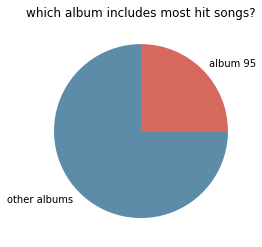

In [23]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([25, 75])

plt.pie(y,
        labels=['album 95','other albums'], # labels 
        colors=["#d5695d", "#5d8ca8"], # colors
       )
plt.title("which album includes most hit songs?") # pie chart title
plt.show()

# Artist Popularity
## question 9

Who are the top 20 best selling artist in the five years (2009-2013) and how much do these artists earn from their music over these years?

To answer this question, we select the top 20 best selling artists according to the sales amount of their tracks, and we list the income each of these artists(composer/band) earn from their tracks.

In [24]:
sql_query = """
SELECT
  ar.Name AS ComposerName_BandName,
  SUM(tr.UnitPrice) AS Income
FROM Track tr
JOIN InvoiceLine in_line
  ON tr.TrackId = in_line.TrackId
JOIN Album al
  ON al.AlbumId = tr.AlbumId
JOIN Artist ar
  ON ar.ArtistId = al.ArtistId
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20;
"""

pd.read_sql(sql_query, conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ComposerName_BandName,Income
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75
6,Os Paralamas Do Sucesso,44.55
7,Deep Purple,43.56
8,Faith No More,41.58
9,Eric Clapton,39.60


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


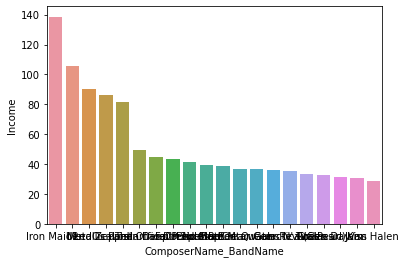

In [25]:
import seaborn as sns
df = pd.read_sql(sql_query, conn)
sns.barplot(x = "ComposerName_BandName", y="Income",data=df);

This bar chart visualizes our query result, and it shows that “Iron Maiden” is the best selling artist over these years!

Also, since the top 4 best selling artists are all rock band, this again exemplifies that rock music is really popular!

## Question 10

Who are the top 20 most productive artists in these five years and how many albums do these artists produce? We define the number of albums a artist created as his productivity.  

To answer this question, we select the top 20 most productive artists according to the number of their albums in the database, and count the album number of each of these artists.

In [26]:
sql_query = """
SELECT
  ar.Name AS ComposerName_BandName,
  COUNT(al.AlbumId) AS ProductionNumber
FROM Album al
JOIN Artist ar
  ON al.ArtistId = ar.ArtistId
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20;
"""

pd.read_sql(sql_query, conn)

D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ComposerName_BandName,ProductionNumber
0,Iron Maiden,21
1,Led Zeppelin,14
2,Deep Purple,11
3,U2,10
4,Metallica,10
5,Ozzy Osbourne,6
6,Pearl Jam,5
7,Van Halen,4
8,Various Artists,4
9,Foo Fighters,4


D:\360downloads\Anoconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


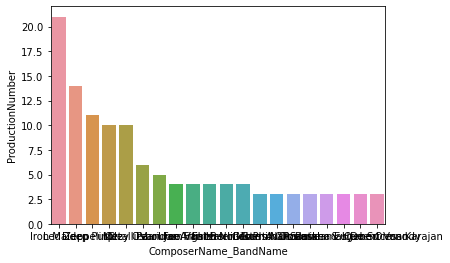

In [137]:
import seaborn as sns
df = pd.read_sql(sql_query, conn)
sns.barplot(x = "ComposerName_BandName", y="ProductionNumber",data=df);

#### Result analysis
However, in writing this query, we realize that the current information we have in the Chinook database may not enough as the album/track production numbers of artists are not included in this database. Although we can count how many albums/tracks an artist has in this database, the counting results are based on the customers consumption, not based on the actual production. For example, artist A may produce 50 tracks during 2009-2013, but only 2 of them are bought by Chinook customers. Thus, if we try to figure out how many tracks artist A has by writing a query, in this case we would have the result as 2, not 50. In contrast, artist B may produce 10 songs in these five years, but each is purchased. If we only look at the query results, we would think that artist B is more productive than artist A during 2009-2013. But it may not be the case in reality.
